# Diabetes Prediction Model

#### Our Features:

> **Pregnancies** - Number of pregnancies
> **Glucose** - 2-hour plasma glucose concentration in the oral glucose tolerance test
> **BloodPressure** - Diastolic Blood Pressure
> **SkinThickness** - Thickness of Skin
> **Insulin**- 2-hour serum insulin
> **DiabetesPedigreeFunction** -
> **BMI** - Body Mass Index
> **Age** - Age
> **Outcome** - Diabetic ( 1 or 0 )

### Importing Necessary Libraries

In [1]:
# For Loading and Manipulating the data
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# For splitting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# For Evaluation 
from sklearn.metrics import classification_report, confusion_matrix,f1_score
from time import time

# For Visualization Purposes 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To display all the columns ( regardless of their number or their width )
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# To change the style of the plots ( so that we all can see the same thing :) )
plt.style.use('seaborn')


### Calling The Data Set

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
#shape of dataset
df.shape

(768, 9)

In [4]:
#First five rows of data
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Last five rows of data
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#Statics of different columns of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
#Checking datatype of different columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Checking total number of missing values in all columns
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Checking duplicate rows
df.duplicated().sum()

0

### Conclusion:
* we have (768,9) data shape.
* it's good being columns already numerical and has no nan or missing values, but there may be hidden missing values, let's see..
* we can notice that unexpexted values for min values in ["Glucose","BloodPressure","Insulin","SkinThickness","BMI"] columns, i will deal with them as a nan values..

In [10]:
# this for loop to see all the data that have unexpected values
cols = ["Glucose","BloodPressure","Insulin","SkinThickness","BMI"]
to_see = []
for col in cols:
    unex_values = df[df[col] == 0]
    to_see.append(unex_values)
to_see

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 75             1        0             48             20        0  24.7   
 182            1        0             74             20       23  27.7   
 342            1        0             68             35        0  32.0   
 349            5        0             80             32        0  41.0   
 502            6        0             68             41        0  39.0   
 
      DiabetesPedigreeFunction  Age  Outcome  
 75                      0.140   22        0  
 182                     0.299   21        0  
 342                     0.389   22        0  
 349                     0.346   37        1  
 502                     0.727   41        1  ,
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 7             10      115              0              0        0  35.3   
 15             7      100              0              0        0  30.0   
 49             7      105              

#### There are a lot of unexpected values, But We can handle them

In [11]:
df[cols] = df[cols].replace(0,np.nan)

In [12]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


now the data is more realistic, had a nan values so let's impute it...
but first lets see the type of our data distributions to decide how can impute it..!

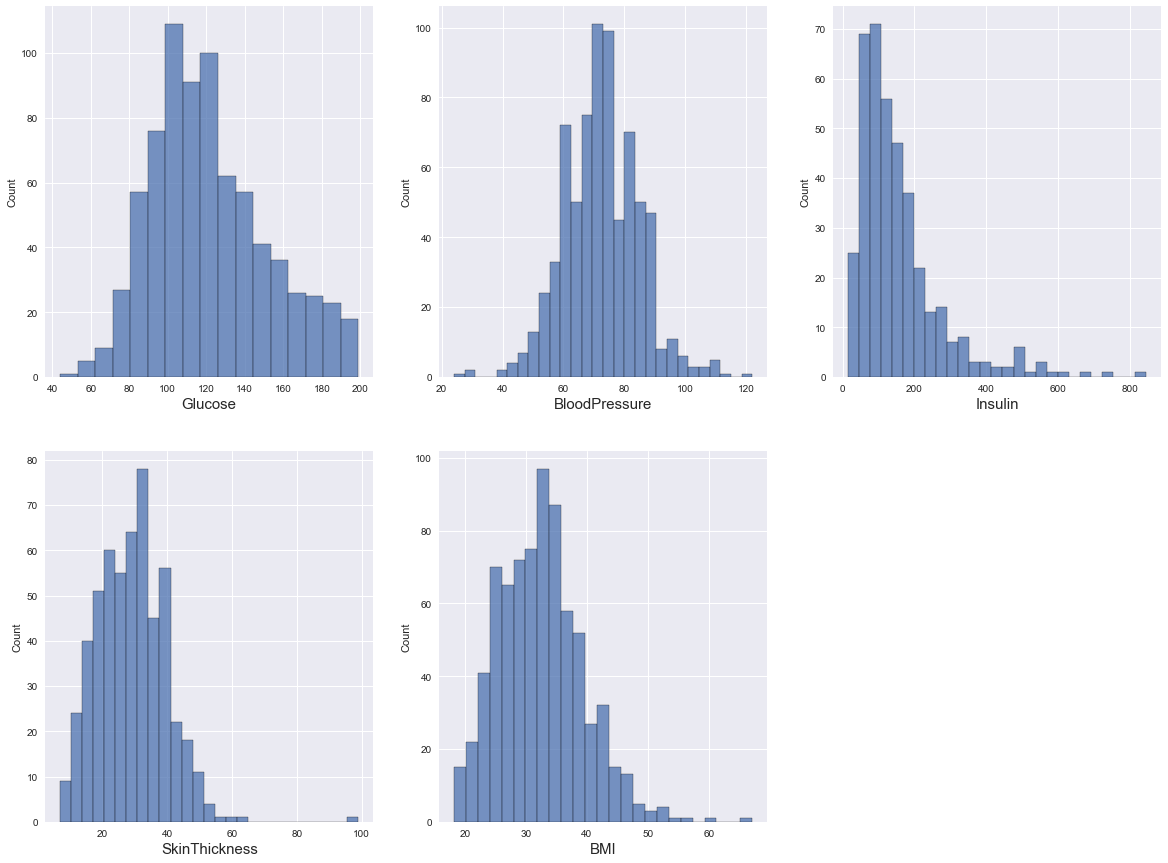

In [14]:
#see the type of our data distributions to decide how can impute it..!
plt.figure(figsize=(20,15))
for i,col in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

Our Insights:

    Glucose:
        - skweed to right so we will impute it by (median)
    BloodPressure:
        - looks normal so (mean or mrdian)
    SkinThickness:
        - skweed to right approximately so (median)
    BMI:
        - skweed to right so (median)

In [15]:
for col in cols:
    df[col] = df[col].fillna(df[col].median())

In [16]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Outliers

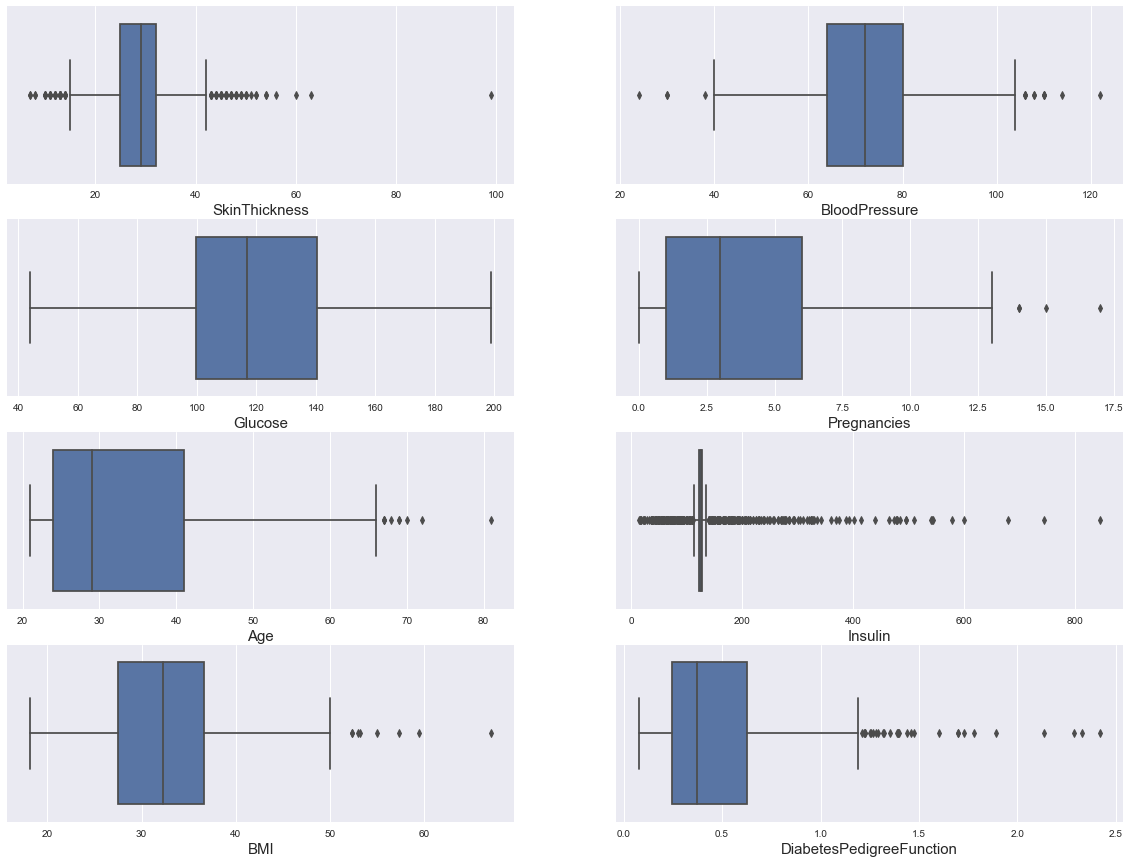

In [17]:
# detect outliers by boxplot visualization
plt.figure(figsize=(20,15))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

#### handle and manipulate the most columns with outliers

In [18]:
# Function to detect outliers in every feature and fix it
def detect_outliers(df):
    outliers= pd.DataFrame(columns=["Feature","NO Outliers","Handled?"])
    for col in list(set(df.select_dtypes(include=np.number).columns)-{'Outcome'}):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        N_O_O = df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]
                   
        df.loc[(df[col] < fence_low),col] = fence_low
        df.loc[(df[col] > fence_high),col] = fence_high
        #let's fix them
        #df[col] = np.where((df[col] > fence_high) | (df[col] > fence_high),df[col].median(),df[col])
        outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
    return outliers
detect_outliers(df)

,Feature,NO Outliers,Handled?
0,SkinThickness,87,True
1,BloodPressure,14,True
2,Glucose,0,True
3,Pregnancies,4,True
4,Age,9,True
5,Insulin,346,True
6,BMI,8,True
7,DiabetesPedigreeFunction,29,True


### Box Plot After Outlier Removal

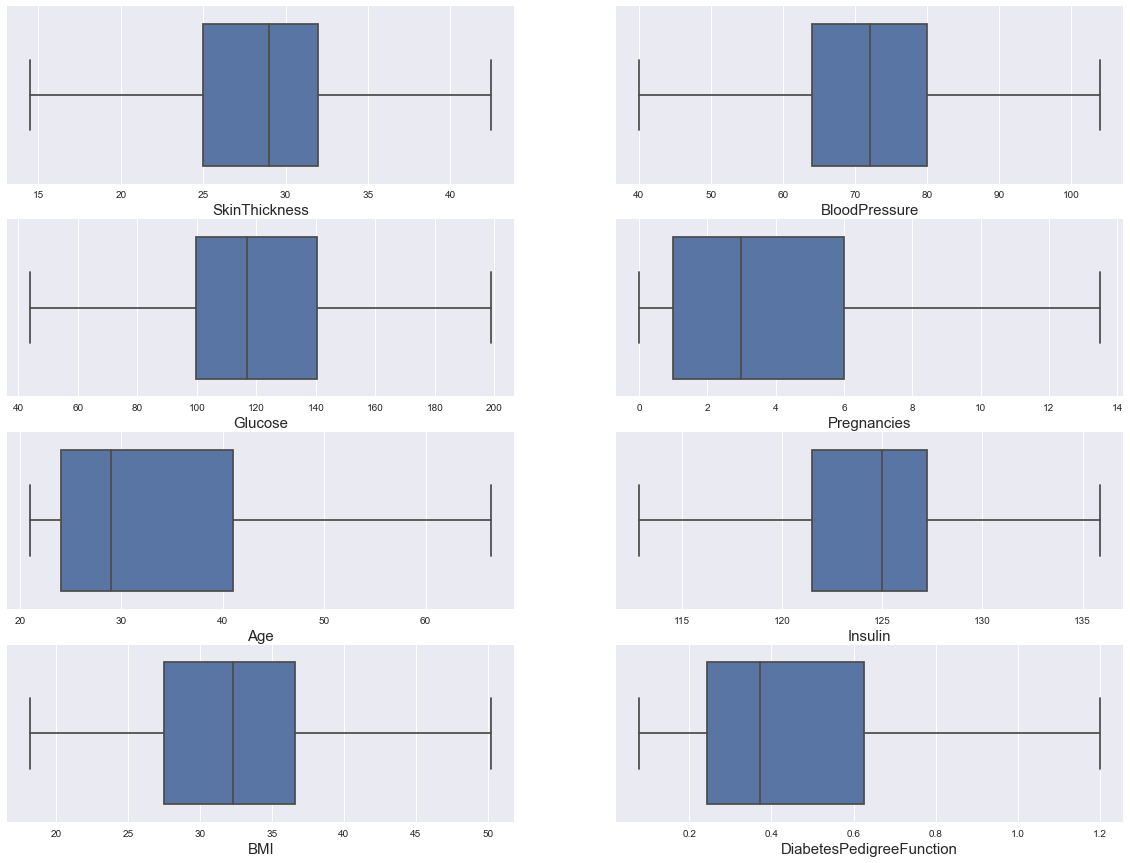

In [19]:
plt.figure(figsize=(20,15))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

#### Now it is much better

### EDA

0    500
1    268
Name: Outcome, dtype: int64


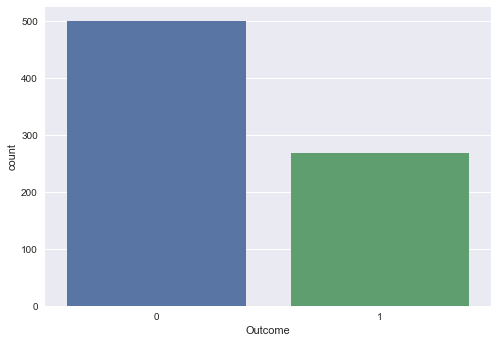

In [20]:
print(df['Outcome'].value_counts())
sns.countplot(df["Outcome"])
plt.show()

Unbalanced....

In [21]:
# let's see the unique values for the pregnancies column..
df.Pregnancies.unique()

array([ 6. ,  1. ,  8. ,  0. ,  5. ,  3. , 10. ,  2. ,  4. ,  7. ,  9. ,
       11. , 13. , 13.5, 12. ])

             Outcome
Pregnancies         
0.0               38
1.0               29
2.0               19
3.0               27
4.0               23
5.0               21
6.0               16
7.0               25
8.0               22
9.0               18
10.0              10
11.0               7
12.0               4
13.0               5
13.5               4


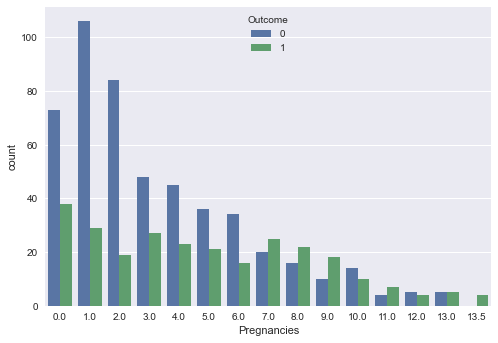

In [22]:
print(df[['Pregnancies','Outcome']].groupby('Pregnancies').sum())
sns.countplot(df['Pregnancies'],hue=df['Outcome'])
plt.show()

most of people that have diabetes have no pregnancy cases before .....

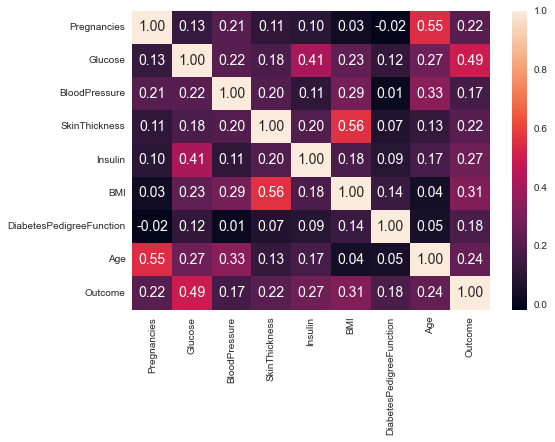

In [23]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={'fontsize':14});

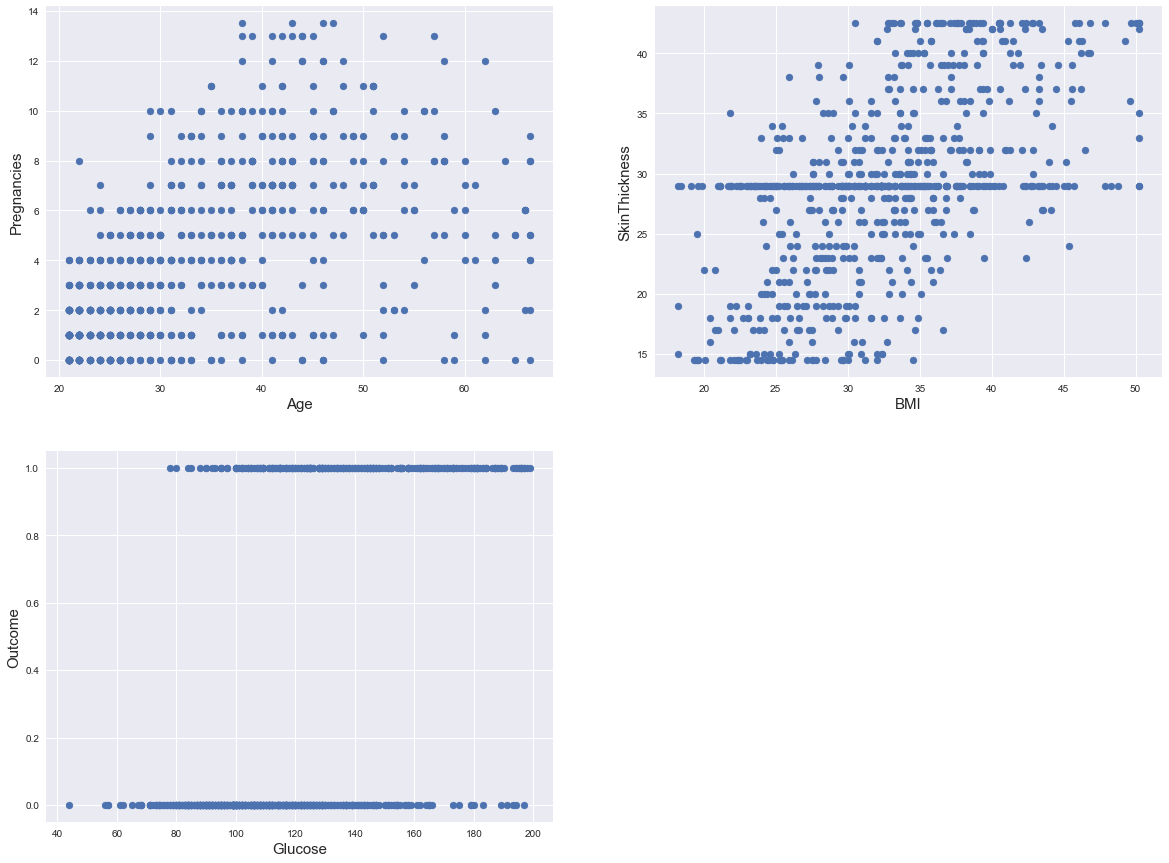

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.scatter(x=df['Age'],y=df['Pregnancies'])
plt.xlabel('Age',fontsize=15)
plt.ylabel('Pregnancies',fontsize=15)
plt.subplot(2,2,2)
plt.scatter(x=df['BMI'],y=df['SkinThickness'])
plt.xlabel('BMI',fontsize=15)
plt.ylabel('SkinThickness',fontsize=15)
plt.subplot(2,2,3)
plt.scatter(x=df['Glucose'],y=df['Outcome'])
plt.xlabel('Glucose',fontsize=15)
plt.ylabel('Outcome',fontsize=15)
plt.show()

from heatmap these are the most features have strong relation between each other

let's see the relation between each feature and the outcome column but by barplot this time..

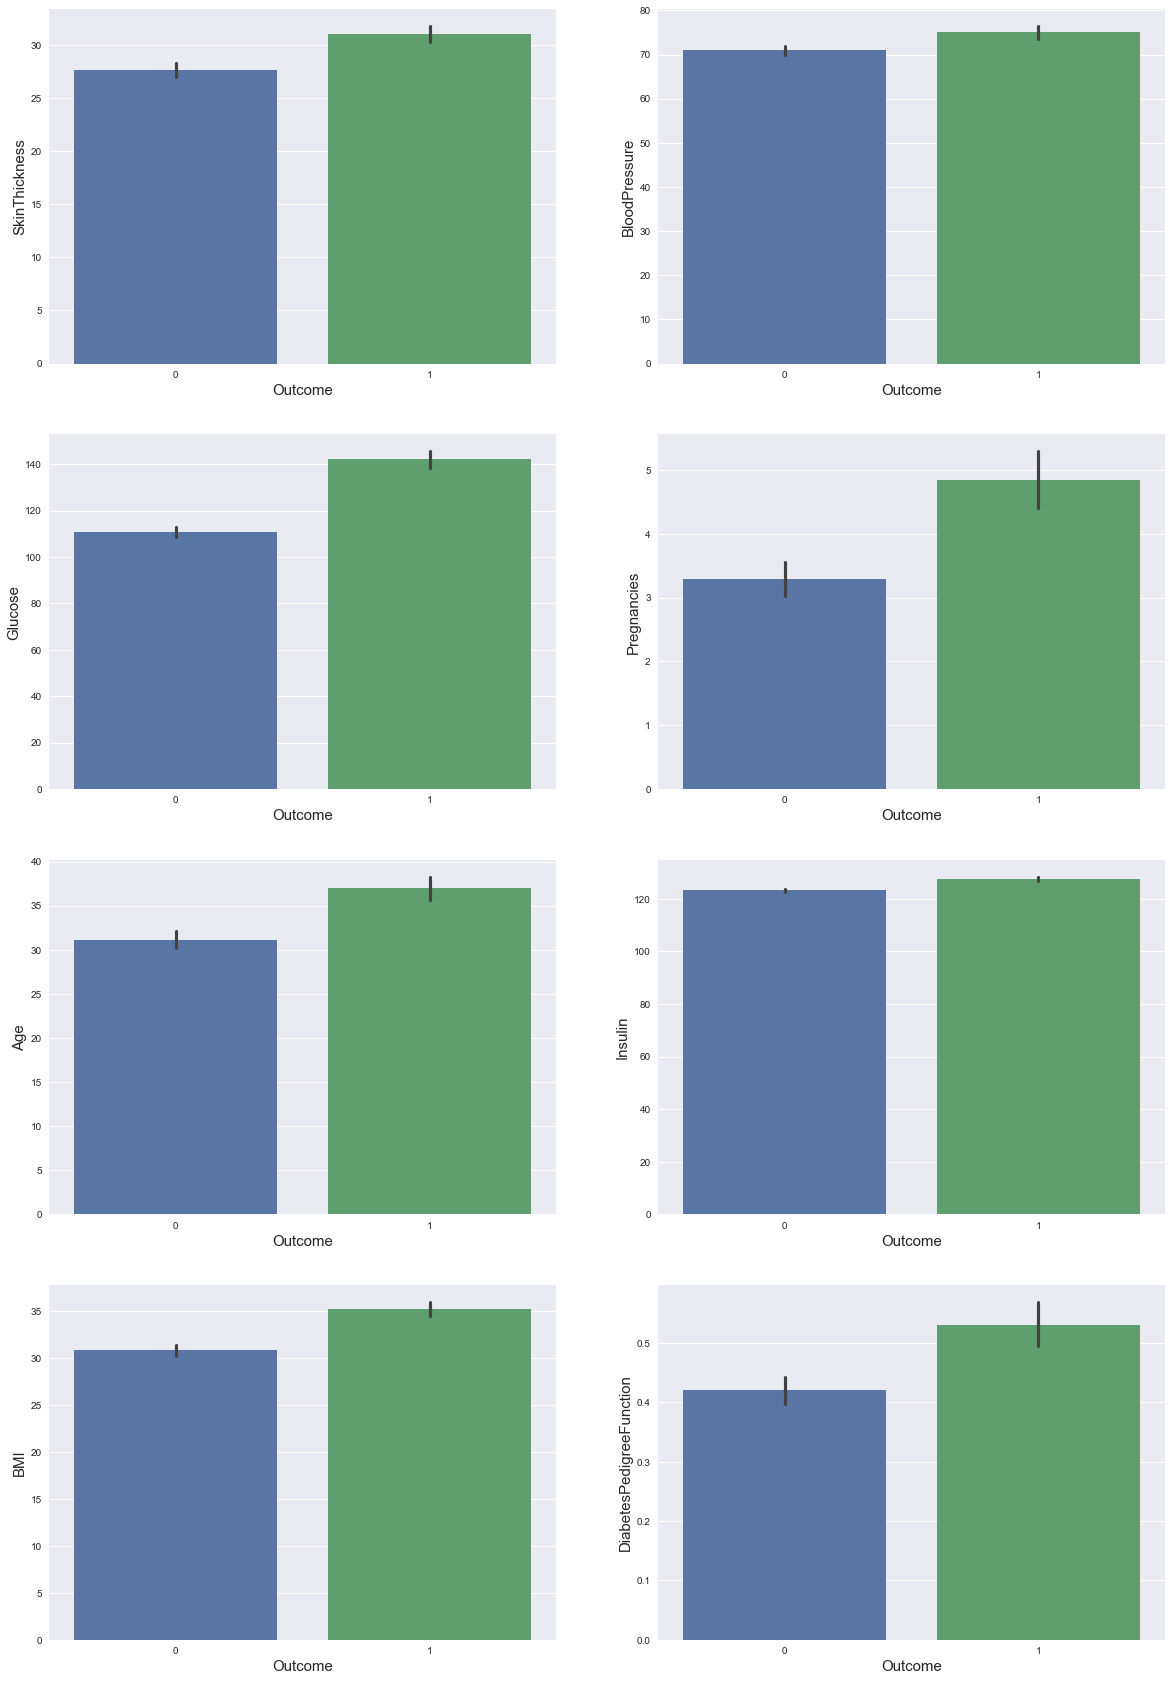

In [25]:
plt.figure(figsize=(20,30))
for i,col in enumerate(set(df.columns)-{"Outcome"}):
    plt.subplot(4,2,i+1)
    sns.barplot(data=df,x="Outcome",y=col,)
    plt.xlabel("Outcome", fontsize=15)
    plt.xticks(fontsize=10)
    plt.ylabel(col,fontsize=15)
    plt.yticks(fontsize=10)

We can see that all people that have diabetes also have high percentage of BloodPressure, BMI, Insulin, DiabetesPedigreeFunction, SkinThickness, Glucose and Pregnancies
also they are more older

### Modeling

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1


In [27]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [29]:
y_train.value_counts()

0    397
1    217
Name: Outcome, dtype: int64

In [30]:
X_train.shape

(614, 8)

In [31]:
X_test.shape

(154, 8)

In [32]:
from sklearn.preprocessing import StandardScaler 

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[ 0.04970131, -0.81410199, -1.07367143, ..., -0.61623012,
        -0.05523219, -0.98902324],
       [-1.13540951, -0.16425979, -0.05067762, ...,  0.21436402,
         1.64282678,  0.90235156],
       [-0.5428541 , -0.00179924, -1.7556673 , ...,  0.57033293,
         1.24001525, -0.47319375],
       ...,
       [ 0.04970131, -0.26173612, -0.73267349, ..., -0.51240585,
        -1.15601888, -0.81708008],
       [-0.2465764 , -0.22924401, -0.56217453, ...,  0.85214166,
        -1.07267857, -0.47319375],
       [-0.2465764 ,  1.55782205, -0.73267349, ...,  0.31818828,
        -0.35734084, -0.30125058]])

### Different Models
#### SVM, RANDOM FOREST, LOGISTIC REGRESSION, DECISSION TREE, GRADIENT BOOSTING

In [35]:
model_params={
    "svm":{
        'model': SVC(gamma="auto",random_state=0),
        'params':{
            'C':[i for i in range(1,10)],
            'kernel': ["linear","rbf"]
        }
    },
    "random_forest":{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [i for i in range(1,10)]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear'),
        'params':{
            'C': [i for i in range(1,10)]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(random_state=0),
        'params':{
             'max_depth':[i for i in range(1,5)]
        }
    },
    "gradient_boosting":{
        'model': GradientBoostingClassifier(),
        'params':{
            'max_depth':[i for i in range(1,5)],
            'n_estimators':[i for i in range(1,5)]
        }
        
    },
}

#### Try each model with the original data

for  SVC(gamma='auto', random_state=0)  confusion metrics is 


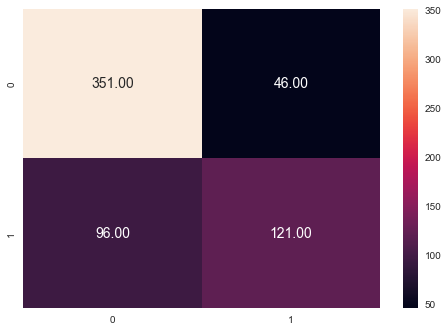

for  RandomForestClassifier()  confusion metrics is 


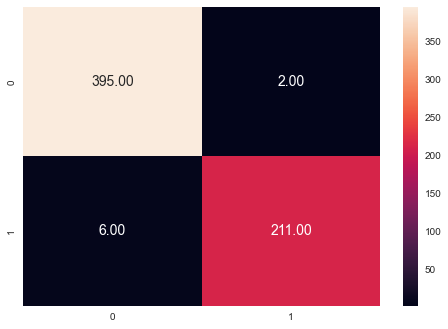

for  LogisticRegression(solver='liblinear')  confusion metrics is 


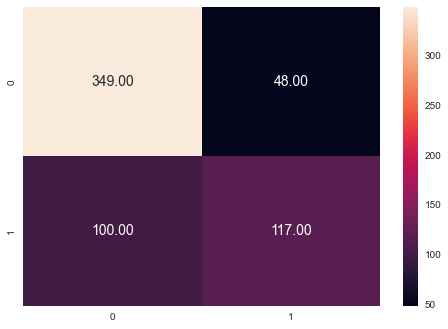

for  DecisionTreeClassifier(random_state=0)  confusion metrics is 


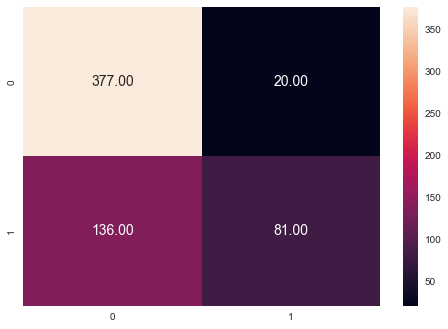

for  GradientBoostingClassifier()  confusion metrics is 


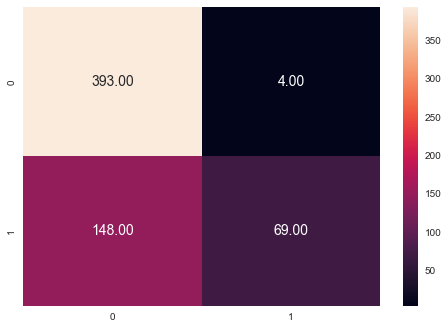

,model,best score,best params,f1 score
0,svm,0.762242,"{'C': 1, 'kernel': 'linear'}",0.630208
2,logistic_regression,0.758990,{'C': 2},0.612565
1,random_forest,0.723031,{'n_estimators': 9},0.981395
3,decision_tree,0.714981,{'max_depth': 2},0.509434
4,gradient_boosting,0.700360,"{'max_depth': 4, 'n_estimators': 4}",0.475862


In [36]:
scores = []
for mn,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_train)
    scores.append({
        'model' : mn,
        'best score': clf.best_score_,
        "best params": clf.best_params_,
        "f1 score": f1_score(y_train,y_pred)
    })
    
    print('for ',mp['model'], ' confusion metrics is ')
    sns.heatmap(confusion_matrix(y_train,y_pred),annot=True, fmt='.2f', annot_kws={'fontsize':14})
    plt.show()
    
df1 = pd.DataFrame(scores, columns=["model","best score",'best params',"f1 score"])
df1.sort_values(by=['best score'], ascending=False)

#### Try each model with the scaled data

for  SVC(gamma='auto', random_state=0)  confusion metrics is 


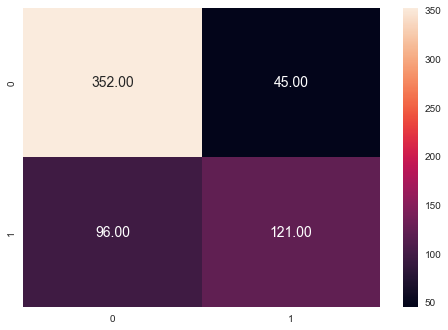

for  RandomForestClassifier()  confusion metrics is 


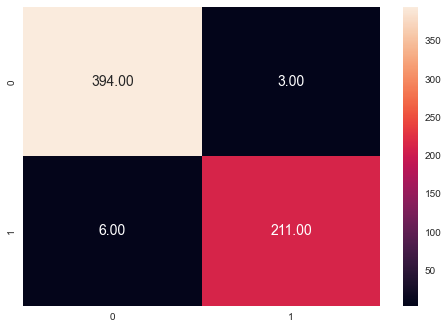

for  LogisticRegression(solver='liblinear')  confusion metrics is 


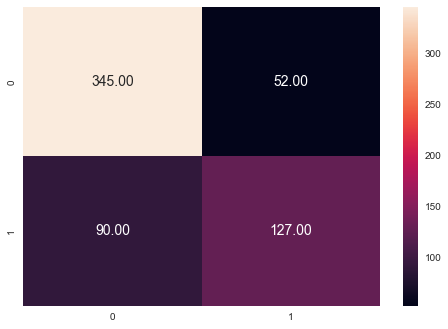

for  DecisionTreeClassifier(random_state=0)  confusion metrics is 


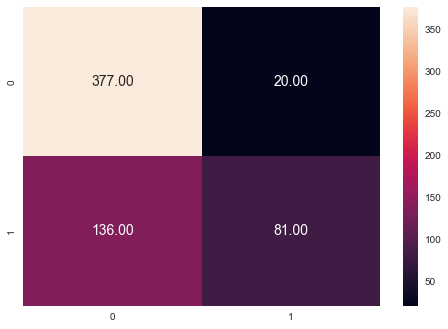

for  GradientBoostingClassifier()  confusion metrics is 


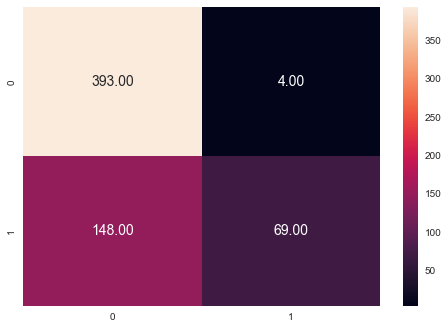

,model,best score,best params,f1 score
0,svm,0.763868,"{'C': 9, 'kernel': 'linear'}",0.631854
2,logistic_regression,0.758963,{'C': 1},0.641414
1,random_forest,0.737705,{'n_estimators': 9},0.979118
3,decision_tree,0.714981,{'max_depth': 2},0.509434
4,gradient_boosting,0.697108,"{'max_depth': 4, 'n_estimators': 4}",0.475862


In [37]:
scores_scaled = []
for mn,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train_scaled,y_train)
    y_pred=clf.predict(X_train_scaled)
    scores_scaled.append({
        'model' : mn,
        'best score': clf.best_score_,
        "best params": clf.best_params_,
        "f1 score": f1_score(y_train,y_pred)
    })
    
    print('for ',mp['model'], ' confusion metrics is ')
    sns.heatmap(confusion_matrix(y_train,y_pred),annot=True, fmt='.2f', annot_kws={'fontsize':14})
    plt.show()
    
df2 = pd.DataFrame(scores_scaled, columns=["model","best score",'best params','f1 score'])
df2.sort_values(by=['best score'], ascending=False)

as we see approximatly having no difference between scaled and original data, except in MLPClassifier but still SVM the best one..

What about selecting just the Importance features??
let's see the data correlation again..

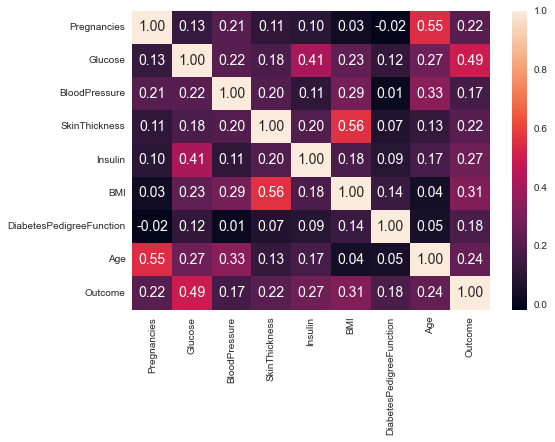

In [38]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={'fontsize':14});

 Again:) these features ['Pregnancies', 'Glucose', 'BMI', 'Age'] have strong relation between each other 

In [39]:
X_selected = df[['Pregnancies', 'Glucose', 'BMI', 'Age']]
X_train_select, X_test_select, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0, stratify=y)

In [40]:
X_train_scaled_select = scaler.fit_transform(X_train_select)
X_test_scaled_select = scaler.transform(X_test_select)

#### Try each model with the original selected data

for  SVC(gamma='auto', random_state=0)  confusion metrics is 


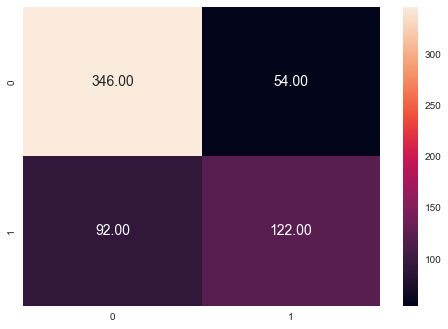

for  RandomForestClassifier()  confusion metrics is 


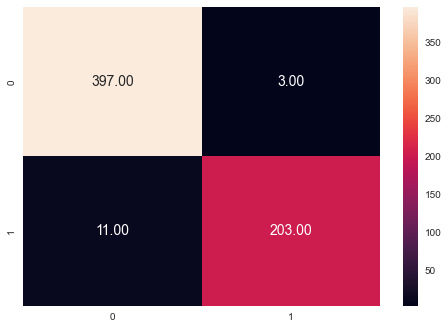

for  LogisticRegression(solver='liblinear')  confusion metrics is 


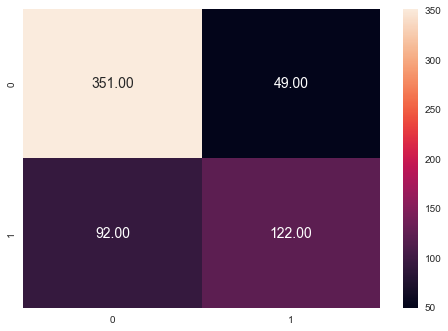

for  DecisionTreeClassifier(random_state=0)  confusion metrics is 


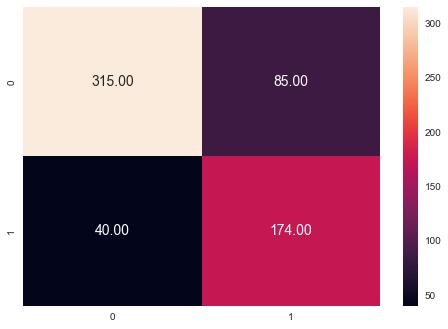

for  GradientBoostingClassifier()  confusion metrics is 


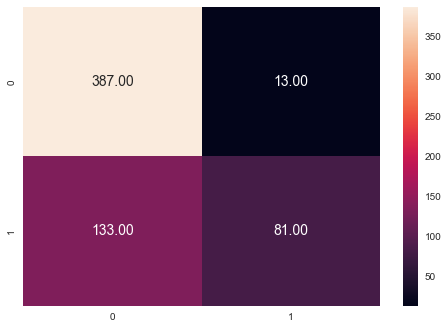

,model,best score,best params,f1 score
0,svm,0.773677,"{'C': 6, 'kernel': 'linear'}",0.625641
2,logistic_regression,0.770412,{'C': 7},0.633766
3,decision_tree,0.755751,{'max_depth': 4},0.735729
1,random_forest,0.741024,{'n_estimators': 8},0.966667
4,gradient_boosting,0.721511,"{'max_depth': 4, 'n_estimators': 4}",0.525974


In [41]:
scores_select = []
for mn,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train_select,y_train)
    y_pred=clf.predict(X_train_select)
    scores_select.append({
        'model' : mn,
        'best score': clf.best_score_,
        "best params": clf.best_params_,
        "f1 score": f1_score(y_train,y_pred)
    })
    
    print('for ',mp['model'], ' confusion metrics is ')
    sns.heatmap(confusion_matrix(y_train,y_pred),annot=True, fmt='.2f', annot_kws={'fontsize':14})
    plt.show()
df1 = pd.DataFrame(scores_select, columns=["model","best score",'best params','f1 score'])
df1.sort_values(by=['best score'], ascending=False)

#### Try each model with the scaled, selected data

for  SVC(gamma='auto', random_state=0)  confusion metrics is 


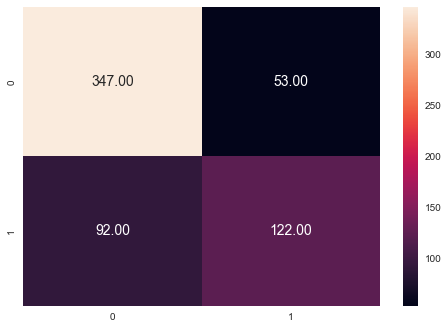

for  RandomForestClassifier()  confusion metrics is 


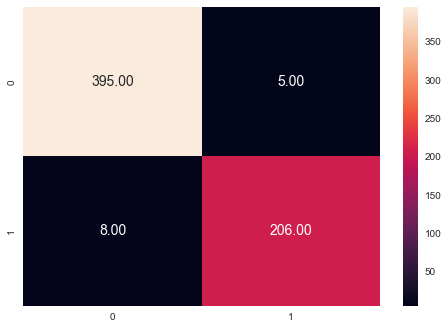

for  LogisticRegression(solver='liblinear')  confusion metrics is 


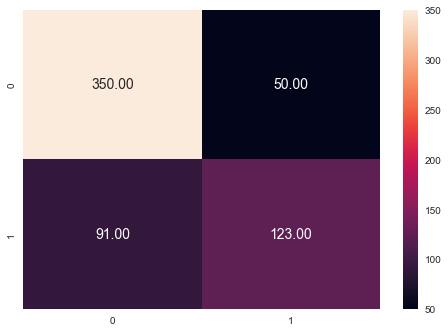

for  DecisionTreeClassifier(random_state=0)  confusion metrics is 


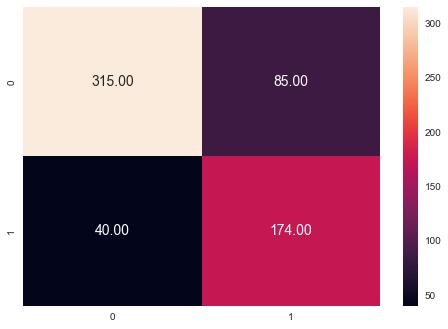

for  GradientBoostingClassifier()  confusion metrics is 


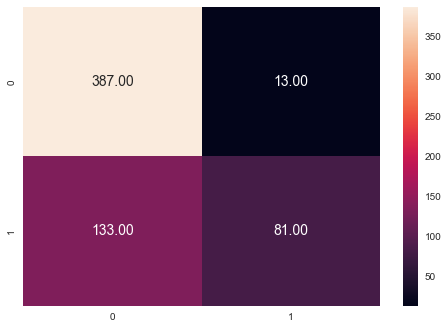

,model,best score,best params,f1 score
2,logistic_regression,0.773664,{'C': 1},0.635659
0,svm,0.762268,"{'C': 3, 'kernel': 'linear'}",0.627249
3,decision_tree,0.755751,{'max_depth': 4},0.735729
1,random_forest,0.724710,{'n_estimators': 7},0.969412
4,gradient_boosting,0.721511,"{'max_depth': 4, 'n_estimators': 4}",0.525974


In [42]:
scores_scaled_select = []
for mn,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train_scaled_select,y_train)
    y_pred=clf.predict(X_train_scaled_select)
    scores_scaled_select.append({
        'model' : mn,
        'best score': clf.best_score_,
        "best params": clf.best_params_,
        "f1 score": f1_score(y_train,y_pred)
    })
    print('for ',mp['model'], ' confusion metrics is ')
    sns.heatmap(confusion_matrix(y_train,y_pred),annot=True, fmt='.2f', annot_kws={'fontsize':14})
    plt.show()
df2 = pd.DataFrame(scores_scaled_select, columns=["model","best score",'best params','f1 score'])
df2.sort_values(by=['best score'], ascending=False)

### Modeling Conclusion
* We can see the best score is coming for `SVM` model, but F1 Score is more for `random_forest`
* Best score for both `svm` and `random_forest` are almost same. So we can say `random_forest` is the best model.
* And it's Accurcy `72.47%` and F1 Score is `96.94%`.